<a href="https://colab.research.google.com/github/KalanaBimsara/Bank-Client-Prediction/blob/main/CW_ML_CM2604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    confusion_matrix
)
!pip install imblearn
!pip install tensorflow
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 577.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.3 MB/s eta 0:00:00


In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/CW_ML/bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')  # The dataset uses a semicolon as the delimiter

# Display the first few rows and basic info
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(None,
    age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  

-----------------------------------------------------------Distribution of Target Variable:-----------------------------------------------------------


<ipython-input-4-e403b4b8db81>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['y'], palette='Set2')


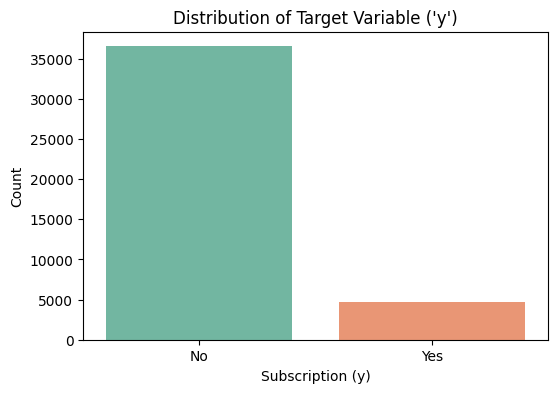

-----------------------------------------------------------Correlation Heatmap:-----------------------------------------------------------


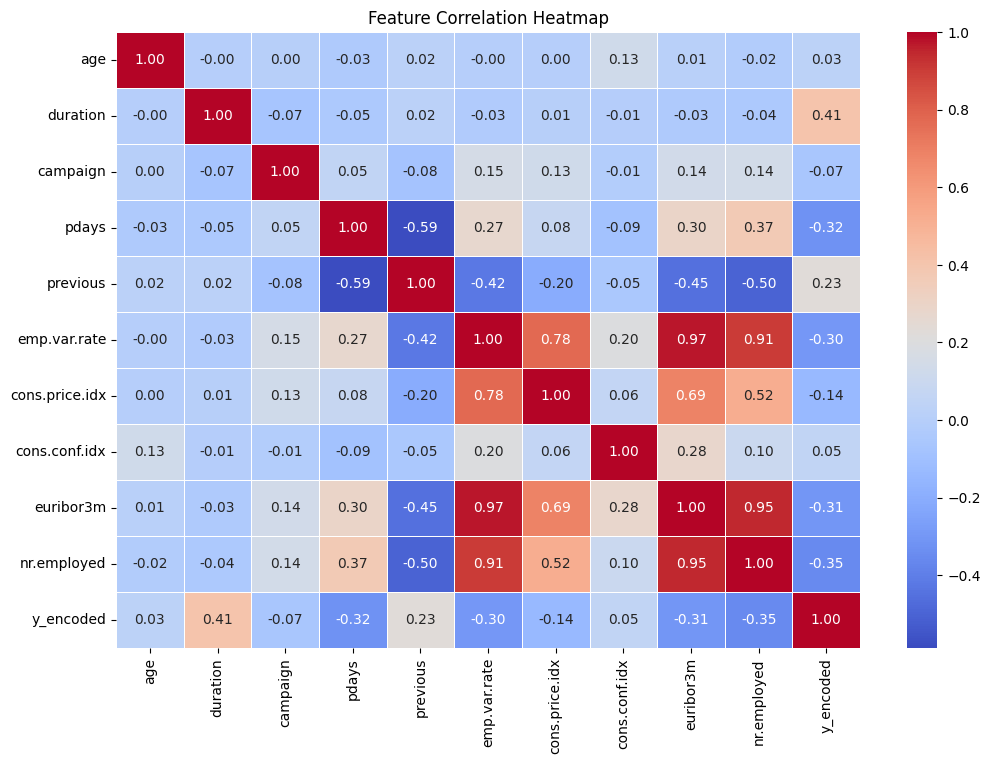

In [4]:
# Visualize the distribution of the target variable ('y')
print("-----------------------------------------------------------Distribution of Target Variable:-----------------------------------------------------------")
plt.figure(figsize=(6, 4))
sns.countplot(x=data['y'], palette='Set2')
plt.title("Distribution of Target Variable ('y')")
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Encode the target variable for heatmap analysis
label_enc = LabelEncoder()
data['y_encoded'] = label_enc.fit_transform(data['y'])  # Encode y as 1 = yes, 0 = no

# Compute the correlation matrix
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Plot the correlation heatmap
print("-----------------------------------------------------------Correlation Heatmap:-----------------------------------------------------------")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Remove the encoded 'y' column used for the heatmap
data.drop(columns=['y_encoded'], inplace=True)

In [5]:
# Step 1: Drop irrelevant or redundant columns
# These columns are removed because they are either not useful for prediction

columns_to_drop = ['duration', 'contact', 'day_of_week', 'month', 'poutcome', 'emp.var.rate', 'nr.employed', 'default']
data.drop(columns=columns_to_drop, inplace=True)

# Step 2: Handle missing/unknown values
# Replace "unknown" with NaN
data.replace('unknown', pd.NA, inplace=True)

# Impute missing values
for col in data.columns:
    if data[col].isna().sum() > 0:
        if data[col].dtype == 'object':
            # Fill missing values in categorical columns with the mode
            data[col] = data[col].fillna(data[col].mode()[0])
        else:
            # Fill missing values in numerical columns with the median
            data[col] = data[col].fillna(data[col].median())

# Step 3: Encode categorical features
# Encode the target variable (binary target, 1 = yes, 0 = no)
label_enc = LabelEncoder()
data['y'] = label_enc.fit_transform(data['y'])  # 1 = yes, 0 = no

# One-hot encode other categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)  # Avoid dummy variable trap

# Step 4: Separate features and target
X = data.drop('y', axis=1)
y = data['y']

# Step 5: Handle imbalanced classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class balance after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Rename scaled features
X_test_scaled = scaler.transform(X_test)

# show information
print("Preprocessing completed.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train distribution:\n{pd.Series(y_train).value_counts()}")

Class distribution after SMOTE:
y
0    36548
1    36548
Name: count, dtype: int64
Preprocessing completed.
X_train_scaled shape: (51167, 27)
X_test_scaled shape: (21929, 27)
y_train distribution:
y
1    25584
0    25583
Name: count, dtype: int64


In [6]:
# Display the preprocessed data
print("Preprocessed Data:")
print(data.head())

Preprocessed Data:
   age  campaign  pdays  previous  cons.price.idx  cons.conf.idx  euribor3m  \
0   56         1    999         0          93.994          -36.4      4.857   
1   57         1    999         0          93.994          -36.4      4.857   
2   37         1    999         0          93.994          -36.4      4.857   
3   40         1    999         0          93.994          -36.4      4.857   
4   56         1    999         0          93.994          -36.4      4.857   

   y  job_blue-collar  job_entrepreneur  ...  marital_married  marital_single  \
0  0            False             False  ...             True           False   
1  0            False             False  ...             True           False   
2  0            False             False  ...             True           False   
3  0            False             False  ...             True           False   
4  0            False             False  ...             True           False   

   education_basic.

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10965
           1       0.93      0.93      0.93     10964

    accuracy                           0.93     21929
   macro avg       0.93      0.93      0.93     21929
weighted avg       0.93      0.93      0.93     21929

Accuracy: 0.93


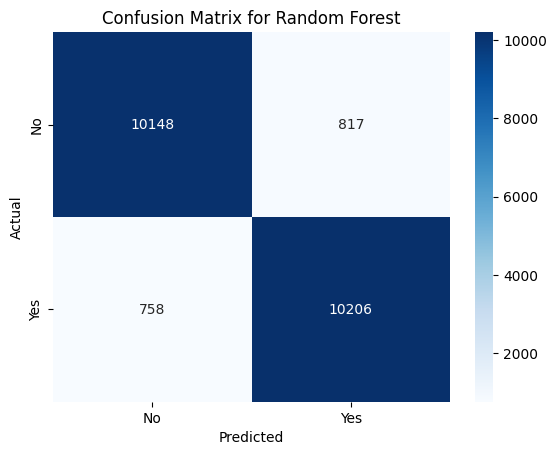

In [7]:
# Step 1: Initialize Random Forest with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Predict probabilities on test data
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 4: Evaluate the model using predicted labels
y_pred_rf = (rf_probs > 0.5).astype(int)  # Convert probabilities to binary predictions
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

# Step 5: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


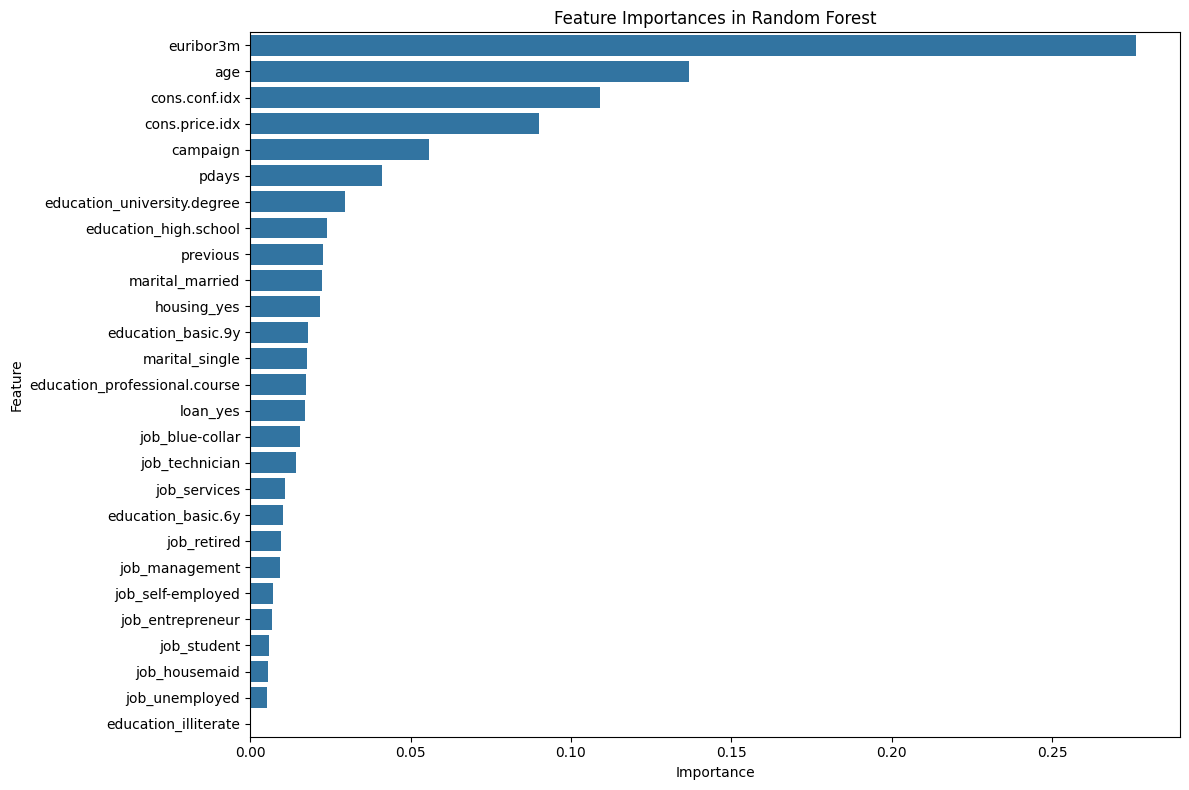

In [8]:
# Step 6: Feature Importance Visualization
importances = rf_model.feature_importances_

# Retrieve column names from the original dataset (before scaling)
features = X.columns  # Use the original column names

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot All Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [9]:
# Step 7: Predict the first 10 clients in the test set
predictions_first_10 = rf_model.predict(X_test[:10])
print("Predictions for the first 10 clients in the test set:")
for idx, pred in enumerate(predictions_first_10, start=1):
    print(f"Client {idx}: {'Subscribed' if pred == 1 else 'Not Subscribed'}")

# Display actual values for comparison
print("\nActual values for the first 10 clients in the test set:")
actual_first_10 = y_test[:10].values
for idx, actual in enumerate(actual_first_10, start=1):
    print(f"Client {idx}: {'Subscribed' if actual == 1 else 'Not Subscribed'}")


Predictions for the first 10 clients in the test set:
Client 1: Not Subscribed
Client 2: Not Subscribed
Client 3: Not Subscribed
Client 4: Subscribed
Client 5: Subscribed
Client 6: Subscribed
Client 7: Subscribed
Client 8: Subscribed
Client 9: Subscribed
Client 10: Not Subscribed

Actual values for the first 10 clients in the test set:
Client 1: Not Subscribed
Client 2: Not Subscribed
Client 3: Not Subscribed
Client 4: Not Subscribed
Client 5: Subscribed
Client 6: Subscribed
Client 7: Subscribed
Client 8: Subscribed
Client 9: Subscribed
Client 10: Not Subscribed


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7548 - loss: 0.4990 - val_accuracy: 0.8259 - val_loss: 0.3891
Epoch 2/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8155 - loss: 0.3984 - val_accuracy: 0.8310 - val_loss: 0.3722
Epoch 3/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8212 - loss: 0.3907 - val_accuracy: 0.8317 - val_loss: 0.3646
Epoch 4/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8277 - loss: 0.3765 - val_accuracy: 0.8356 - val_loss: 0.3602
Epoch 5/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8274 - loss: 0.3778 - val_accuracy: 0.8355 - val_loss: 0.3614
Epoch 6/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8272 - loss: 0.3717 - val_accuracy: 0.8370 - val_loss: 0.3574
Epoch 7/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8311 - loss: 0.3659 - val_accuracy: 0.8344 - val_loss: 0.3571
Epoch 8/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8304 - loss: 0.3664 - val_accurac

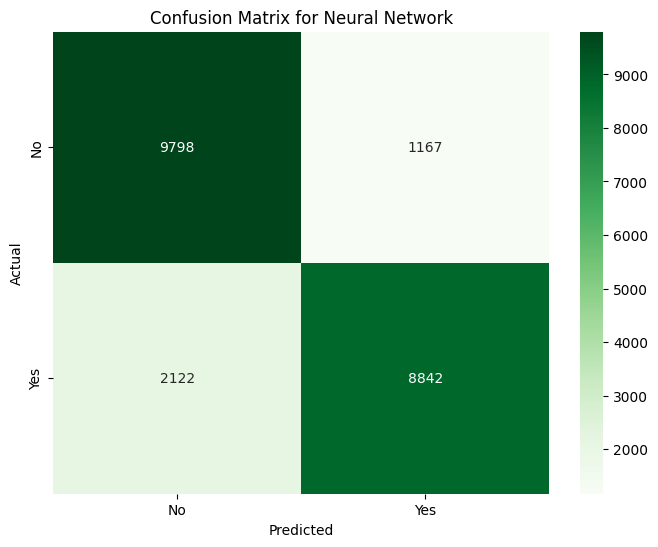

In [10]:
# Initialize Neural Network
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predict probabilities on test data
print("-------------------------------------------------------------------------------------------------------------------------")
y_proba_nn = nn_model.predict(X_test_scaled)
y_pred_nn = (y_proba_nn > 0.5).astype("int32")

# Evaluate the model
print("-------------------------------------------------------------------------------------------------------------------------")
print("Neural Network Performance:")
print(classification_report(y_test, y_pred_nn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

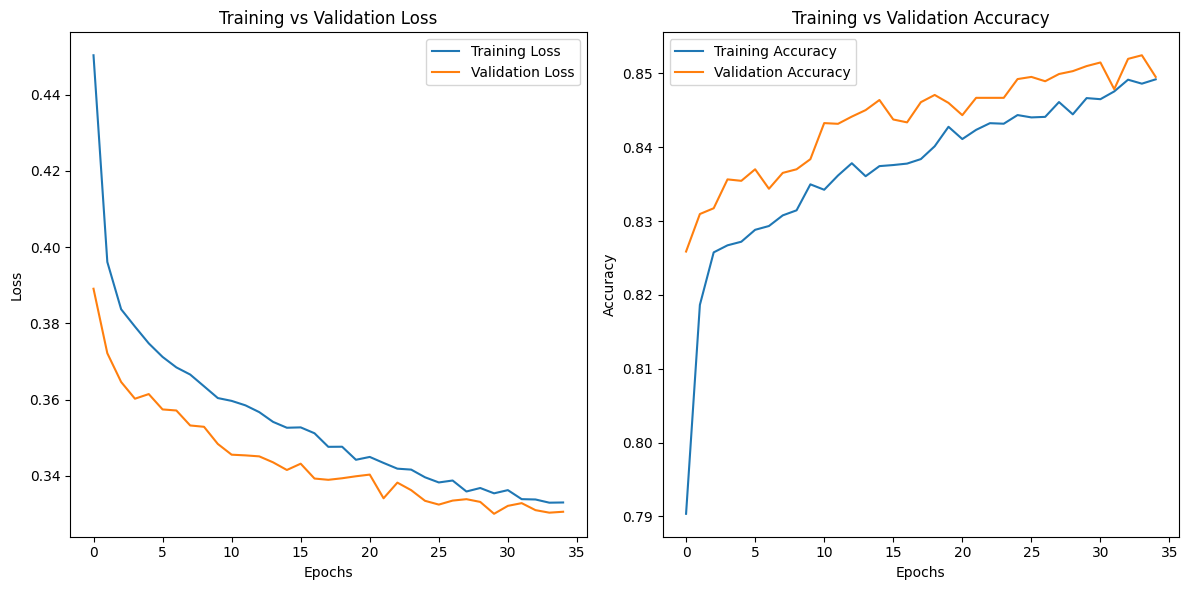

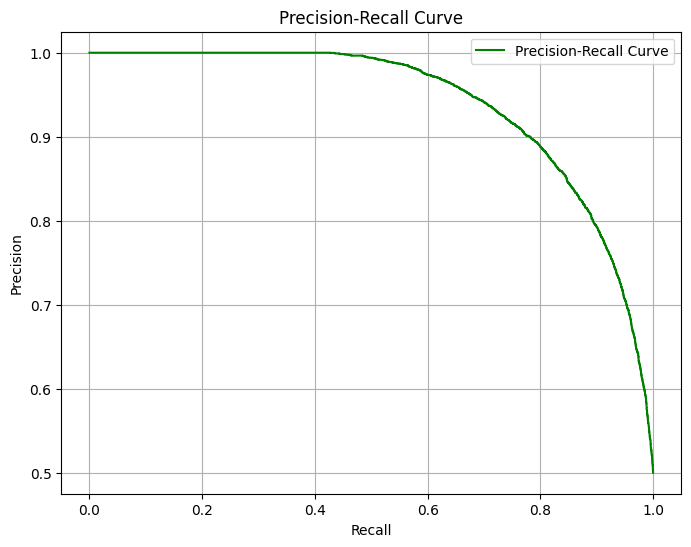

In [11]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.tight_layout()
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_nn)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()




In [12]:
# Predict for the first 10 clients in the test set
first_10_predictions = nn_model.predict(X_test_scaled[:10])
first_10_labels = (first_10_predictions > 0.5).astype("int32")

print("Predictions for the first 10 clients in the test set:")
for i, (proba, pred) in enumerate(zip(first_10_predictions.flatten(), first_10_labels.flatten())):
    print(f"Client {i + 1}: Predicted Probability = {proba:.2f}, Predicted Class = {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predictions for the first 10 clients in the test set:
Client 1: Predicted Probability = 0.27, Predicted Class = 0
Client 2: Predicted Probability = 0.24, Predicted Class = 0
Client 3: Predicted Probability = 0.04, Predicted Class = 0
Client 4: Predicted Probability = 0.59, Predicted Class = 1
Client 5: Predicted Probability = 1.00, Predicted Class = 1
Client 6: Predicted Probability = 0.81, Predicted Class = 1
Client 7: Predicted Probability = 0.96, Predicted Class = 1
Client 8: Predicted Probability = 1.00, Predicted Class = 1
Client 9: Predicted Probability = 1.00, Predicted Class = 1
Client 10: Predicted Probability = 0.21, Predicted Class = 0


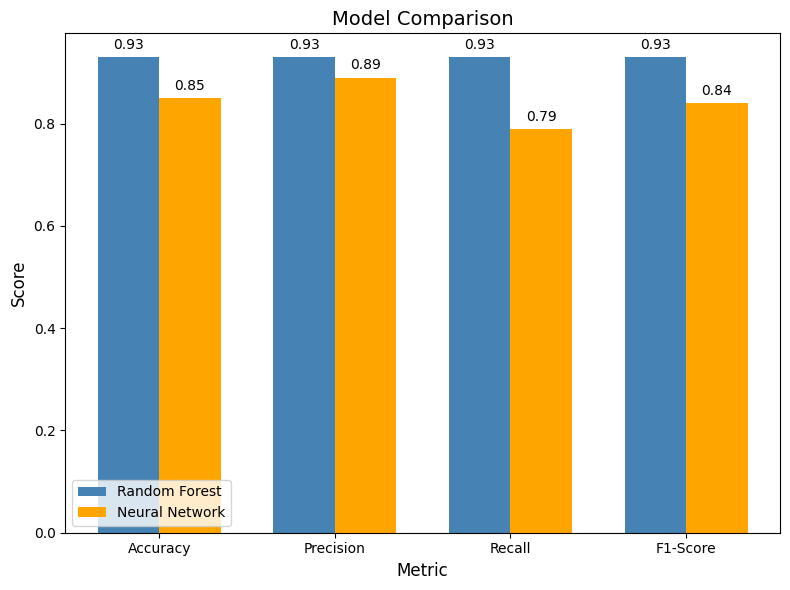

In [13]:
models = ['Random Forest', 'Neural Network']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

rf_metrics = [0.93, 0.93, 0.93, 0.93]  # Random Forest metrics
nn_metrics = [0.85, 0.89, 0.79, 0.84]  # Neural Network metrics

# Combine metrics for plotting
data = np.array([rf_metrics, nn_metrics])

# Bar chart
bar_width = 0.35
index = np.arange(len(metrics))  # Position of metrics on x-axis

# Create bars for each model
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(index, data[0], bar_width, label=models[0], color='steelblue')
bars2 = ax.bar(index + bar_width, data[1], bar_width, label=models[1], color='orange')

# Add labels and title
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Comparison', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate scores on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.01,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Show plot
plt.tight_layout()
plt.show()


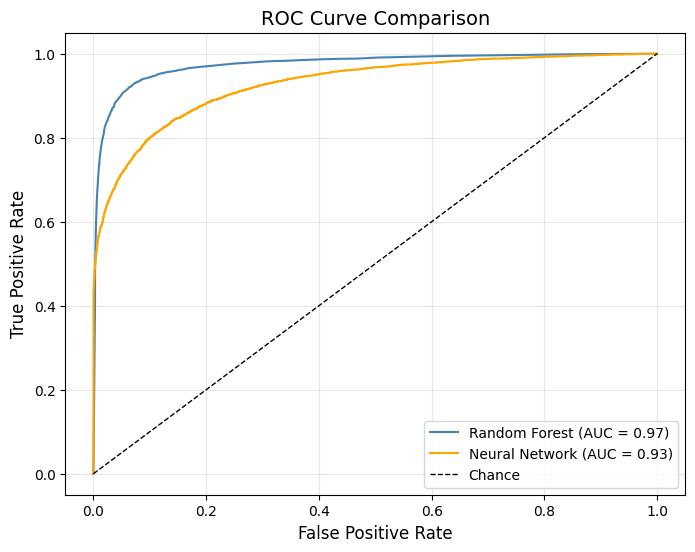

In [14]:
# ROC Curves and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, y_proba_nn)
rf_auc = auc(rf_fpr, rf_tpr)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='steelblue')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Chance')

# Add labels and title
plt.title('ROC Curve Comparison', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [15]:
# prompt: can you save the models that i trained

import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the trained Neural Network model
nn_model.save('neural_network_model.h5')

print("Models saved successfully.")


Models saved successfully.


In [21]:
# prompt: save the label encoder too

# Save the label encoder
joblib.dump(label_enc, 'label_encoder.pkl')
print("Label encoder saved successfully.")


Label encoder saved successfully.


In [35]:
# prompt: i wanna make predictions with user inputs such as job, marital, education, housing, loan

import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import load_model

# Load the saved models and label encoder
rf_model = joblib.load('random_forest_model.pkl')
nn_model = load_model('neural_network_model.h5')
label_encoder = joblib.load('label_encoder.pkl')

# Function to preprocess user input
def preprocess_input(user_input):
    # Create a DataFrame from user input
    input_df = pd.DataFrame([user_input])

    # Load the original training data to get column names and order
    original_data = pd.read_csv('/content/drive/MyDrive/CW_ML/bank-additional-full.csv', sep=';')

    # Drop irrelevant columns
    columns_to_drop = ['duration', 'contact', 'day_of_week', 'month', 'poutcome', 'emp.var.rate', 'nr.employed', 'default', 'y']
    original_data = original_data.drop(columns=columns_to_drop)

    # Replace 'unknown' with NaN for imputation
    original_data.replace('unknown', pd.NA, inplace=True)
    for col in original_data.columns:
      if original_data[col].isna().sum() > 0:
          if original_data[col].dtype == 'object':
              original_data[col] = original_data[col].fillna(original_data[col].mode()[0])
          else:
              original_data[col] = original_data[col].fillna(original_data[col].median())

    # One-hot encode categorical features
    categorical_cols = original_data.select_dtypes(include=['object']).columns
    original_data = pd.get_dummies(original_data, columns=categorical_cols, drop_first=True)

    # Align columns of input data with training data
    input_df = input_df.reindex(columns=original_data.columns, fill_value=0)

    # Scale user input
    scaler = StandardScaler()
    input_scaled = scaler.fit_transform(original_data)
    input_scaled = scaler.transform(input_df)

    return input_scaled

# Get user input
job = input("Enter job: ")
marital = input("Enter marital status: ")
education = input("Enter education: ")
housing = input("Enter housing loan: ")
loan = input("Enter personal loan: ")

user_input = {'job': job, 'marital': marital, 'education': education, 'housing': housing, 'loan': loan}
# Preprocess user input
preprocessed_input = preprocess_input(user_input)


# Make predictions using the Random Forest model
rf_prediction = rf_model.predict(preprocessed_input)[0]

# Make predictions using the Neural Network model
nn_prediction = nn_model.predict(preprocessed_input)[0]

# Decode the predictions using the label encoder
rf_decoded_prediction = label_encoder.inverse_transform([rf_prediction])[0]
nn_decoded_prediction = ("yes" if nn_prediction > 0.5 else "no") # threshold


print(f"\nRandom Forest Prediction: {rf_decoded_prediction}")
print(f"Neural Network Prediction: {nn_decoded_prediction}")


Enter job: manager
Enter marital status: unmarried 
Enter education: high school 
Enter housing loan: yes
Enter personal loan: yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
# prompt: i wanna make predictions with user inputs such as job, marital, education, housing, loan  with drop down menu ooptions

import ipywidgets as widgets
from IPython.display import display

# ... (Your existing code) ...

# Function to make predictions based on user input
def predict_subscription(sender):
    user_input = {
        'job': job_dropdown.value,
        'marital': marital_dropdown.value,
        'education': education_dropdown.value,
        'housing': housing_dropdown.value,
        'loan': loan_dropdown.value,
    }

    preprocessed_input = preprocess_input(user_input)

    rf_prediction = rf_model.predict(preprocessed_input)[0]
    rf_decoded_prediction = label_encoder.inverse_transform([rf_prediction])[0]

    nn_prediction = nn_model.predict(preprocessed_input)[0]
    nn_decoded_prediction = ("yes" if nn_prediction > 0.5 else "no")

    print(f"\nRandom Forest Prediction: {rf_decoded_prediction}")
    print(f"Neural Network Prediction: {nn_decoded_prediction}")

# Create dropdown widgets for user input
# Use the original data DataFrame to get unique values for options
job_dropdown = widgets.Dropdown(
    options=original_data['job'].unique(),  # Access 'job' column from original_data
    description='Job:'
)

marital_dropdown = widgets.Dropdown(
    options=original_data['marital'].unique(),  # Access 'marital' column from original_data
    description='Marital:'
)

education_dropdown = widgets.Dropdown(
    options=original_data['education'].unique(),  # Access 'education' column from original_data
    description='Education:'
)

housing_dropdown = widgets.Dropdown(
    options=original_data['housing'].unique(),  # Access 'housing' column from original_data
    description='Housing:'
)

loan_dropdown = widgets.Dropdown(
    options=original_data['loan'].unique(),  # Access 'loan' column from original_data
    description='Loan:'
)


# Button to trigger prediction
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_subscription)


# Display the widgets
display(job_dropdown, marital_dropdown, education_dropdown, housing_dropdown, loan_dropdown, predict_button)

Dropdown(description='Job:', options=('housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired…

Dropdown(description='Marital:', options=('married', 'single', 'divorced', 'unknown'), value='married')

Dropdown(description='Education:', options=('basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.c…

Dropdown(description='Housing:', options=('no', 'yes', 'unknown'), value='no')

Dropdown(description='Loan:', options=('no', 'yes', 'unknown'), value='no')

Button(description='Predict', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Random Forest Prediction: yes
Neural Network Prediction: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
